# Part 1- Fordgobike Data Exploration

## by Ezerioha Ifeanyi Emmanuel

## Table of contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#access">Access</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



## Preliminary Wrangling

<a id="intro"></a>

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id="gather"></a>

## Gather

In [1]:
#importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the fordgobike dataset

data = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id="access"></a>

## Access

In [3]:
#checking the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
data.duplicated().sum()

0

In [5]:
#checking the first five rows of the dataset

data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#Checking for sum of null values

data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#dropping the NaN values

data.dropna(inplace = True)

In [8]:
# high-level overview of data shape and composition
print(data.shape)
print(data.dtypes)
print(data.head(10))

(174952, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
    duration_sec                start_time                  end_time  \
0          52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2          61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3          36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4           1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5           1793  2019-02-28 23:49:58.6320  2019-03-0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [10]:
#checking the summary statistics of the dataset

data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of my dataset?

> There are 183412 entries with 16 features (duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id,user_type,member_birth_year, member_gender, bike_share_for_all_trip). 

> Six(6) out of the 16 features has null values among its entries.
The datatypes of the features vary between: int, object or float with some features represented in the wrong datatype such as start_time, end_time, end_station_id and member_birth_year

> After dropping the NaN values, we have 174952 entries 

### what is/are the main feature(s) of interest in your dataset?

> The main interest will be to know which day of the week is the most busy

> what is the most popular gender and user type

> The top 10 start_station name 

> What are the most popular station destination

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start and end time 
- user type 
- member gender
- start_station_name
- end_station_name

<a id="clean"></a>

## Clean

In [11]:
data_clean = data.copy()

### Incorrect Datatypes

#### Define

> start_time, end_time, station_ids and member_birth_year not in appropriate datatype

#### Code

In [12]:
#change the dtype of start_time, end_time, station_ids and member_birth_year

data_clean['start_time'] = pd.to_datetime(data_clean['start_time'], infer_datetime_format=True)
data_clean['end_time'] = pd.to_datetime(data_clean['end_time'], infer_datetime_format=True)
data_clean['start_station_id'] = data_clean['start_station_id'].astype(int)
data_clean['end_station_id'] = data_clean['end_station_id'].astype(int)
data_clean['member_birth_year'] = data_clean['member_birth_year'].astype(int)

#### Define

> changing station_ids, member_birth_year and bike_id to strings

#### Code

In [13]:
#converting the start_station_id, end_station_id and member_birth_year to str since we won't be carrying out numerical calculations

data_clean['start_station_id'] = data_clean['start_station_id'].astype(str)
data_clean['end_station_id'] = data_clean['end_station_id'].astype(str)
data_clean['member_birth_year'] = data_clean['member_birth_year'].astype(str)
data_clean['bike_id'] = data_clean['bike_id'].astype(str)

#### Define

> User_type is object datatype instead of categorical

#### Code

In [14]:
#converting user_type to categorical datatype

data_clean['user_type'] = data_clean['user_type'].astype('category')

#### Test

In [15]:
data_clean['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

### Define

> Extract the day of the weeks from the start_time and end_time column

> Extract the hours from the start_time and end_time column

#### Code

In [16]:
data_clean['start_day_of_week'] = data_clean['start_time'].dt.day_name()
data_clean['end_day_of_week'] = data_clean['end_time'].dt.day_name()
data_clean['start_hour'] = data_clean['start_time'].dt.hour
data_clean['end_hour'] = data_clean['end_time'].dt.hour

#### Test

In [17]:
data_clean[['start_day_of_week','end_day_of_week', 'start_hour', 'end_hour']]

,start_day_of_week,end_day_of_week,start_hour,end_hour
0,Thursday,Friday,17,8
2,Thursday,Friday,12,5
3,Thursday,Friday,17,4
4,Thursday,Friday,23,0
5,Thursday,Friday,23,0
...,...,...,...,...
183407,Friday,Friday,0,0
183408,Friday,Friday,0,0
183409,Friday,Friday,0,0
183410,Friday,Friday,0,0


In [18]:
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,end_day_of_week,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,Friday,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,Friday,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,Friday,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,Friday,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,Friday,23,0


###### working with seconds might not give us a good information of how long a trip takes, hence there's need to convert the seconds to minute

In [19]:
data_clean['duration_min'] = data_clean['duration_sec']/60

<a id='uni'></a>

## Univariate Exploration 

#### which gender uses Ford gobikes the most?

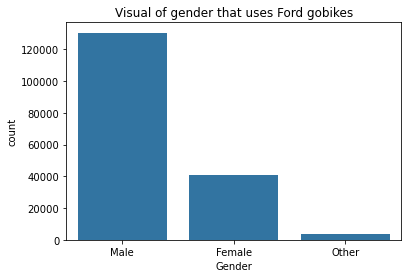

In [20]:
base_color = sns.color_palette()[0]
gender_order = data_clean['member_gender'].value_counts()
sns.countplot(data = data_clean, x='member_gender',order = gender_order.index,  color=base_color)
plt.xlabel('Gender')
plt.title('Visual of gender that uses Ford gobikes');

- from the visualization, it is visible that the male gender makes use of ford gobike, followed by the female gender, with others being the least of the three

In [21]:
data_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

#### which type of user_type dominates the most?

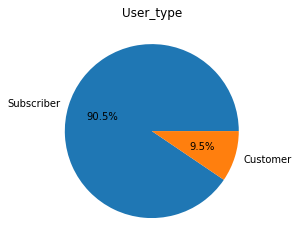

In [22]:
user_data = data_clean['user_type']
plt.pie(data= user_data, x= user_data.value_counts(),autopct='%1.1f%%', labels=user_data.value_counts().index)
plt.title('User_type');

- The subscriber user_type has the largest percentage of users

##### what day of the week is strip started the most?

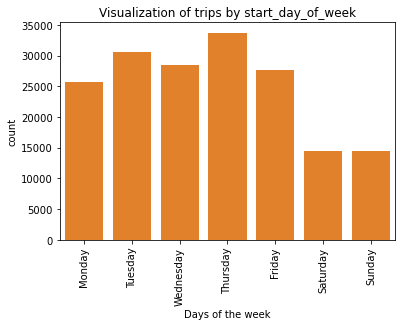

In [23]:
color = sns.color_palette()[1]
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=data_clean, x='start_day_of_week',order = day_of_week,color=color)
plt.xticks(rotation=90);
plt.title('Visualization of trips by start_day_of_week')
plt.xlabel('Days of the week');

- It is visible that on thursdays, most users start their trips, followed by on tuesday. On the other hand, during weekends(saturday and sunday), it is recorded the least

##### what day of the week is strip ended the most?

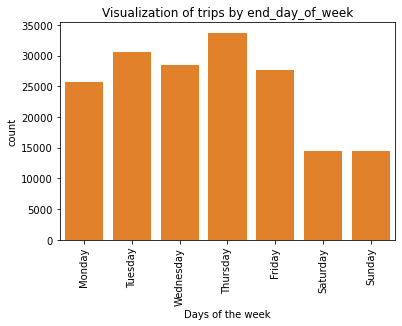

In [24]:
color = sns.color_palette()[1]
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=data_clean, x='end_day_of_week',order = day_of_week,color=color)
plt.xticks(rotation=90);
plt.title('Visualization of trips by end_day_of_week')
plt.xlabel('Days of the week');

- It is observed that the visualization is also same for start day of week

##### what is the distribution of the member birth year?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


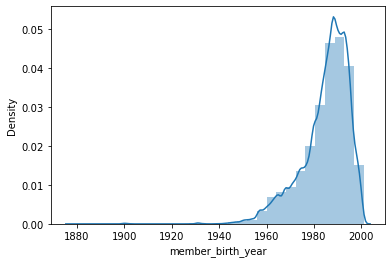

In [25]:
sns.distplot(data_clean['member_birth_year'], bins=30);

- It can be observed that the member birth year is left skewed

##### what birth year dominates the most for users of fordgo bike

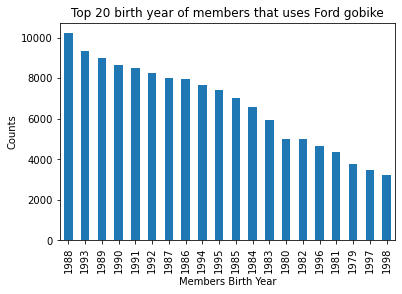

In [26]:
data_clean['member_birth_year'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Members Birth Year')
plt.title('Top 20 birth year of members that uses Ford gobike')
plt.ylabel('Counts');

- From the visualization, it is seen that people born in the year `1988` uses ford gobike the most, followed by members born in the year `1993`

In [27]:
data_clean['start_station_name'].value_counts()[:15].sort_values(ascending=True)

Beale St at Harrison St                                      1678
2nd St at Townsend St                                        1702
Bancroft Way at College Ave                                  1712
Bancroft Way at Telegraph Ave                                1761
The Embarcadero at Sansome St                                1975
Powell St BART Station (Market St at 5th St)                 2144
Steuart St at Market St                                      2191
Howard St at Beale St                                        2216
San Francisco Ferry Building (Harry Bridges Plaza)           2541
San Francisco Caltrain (Townsend St at 4th St)               2577
Powell St BART Station (Market St at 4th St)                 2620
Montgomery St BART Station (Market St at 2nd St)             2711
Berry St at 4th St                                           2952
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Market St at 10th St                                         3649
Name: star

##### which start_station is mostly used by members?

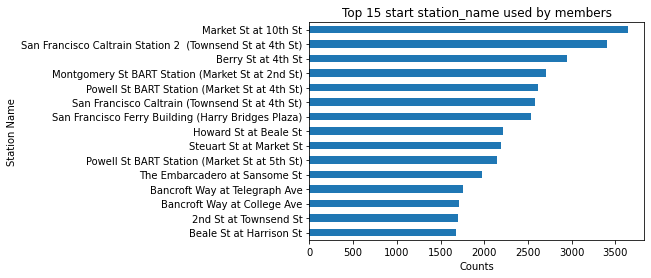

In [28]:
data_clean['start_station_name'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 start station_name used by members')
plt.ylabel('Station Name')
plt.xlabel('Counts');

- `Market St at 10th St` is the mostly used start station

##### which station does most users end their trip?

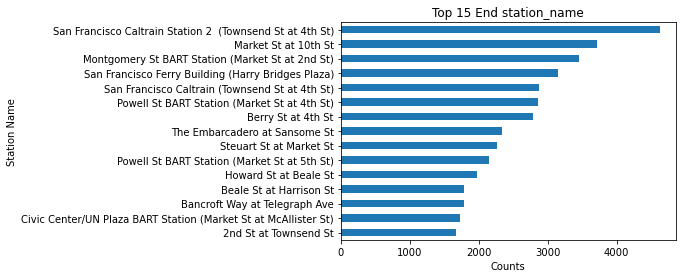

In [29]:
data_clean['end_station_name'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 End station_name')
plt.ylabel('Station Name')
plt.xlabel('Counts');

- Station `San Francisco Caltrain Station 2 (Townsend St at 4th St)` happens to be the most end station for ford gobike users

##### what is the distribution of duration of bike trip in minutes?

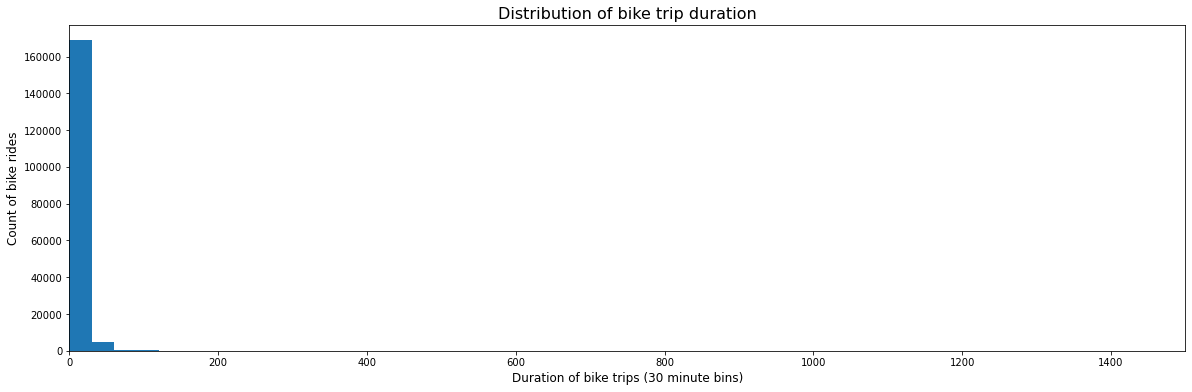

In [30]:
bins = np.arange(0, data_clean.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,6))
plt.hist(data=data_clean, x='duration_min', bins=bins)
plt.xlim((0,1500))
plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (30 minute bins)', fontsize=12)
plt.title('Distribution of bike trip duration', fontsize=16);

##### what is the distribution of bike rides relative to start hour of the day?

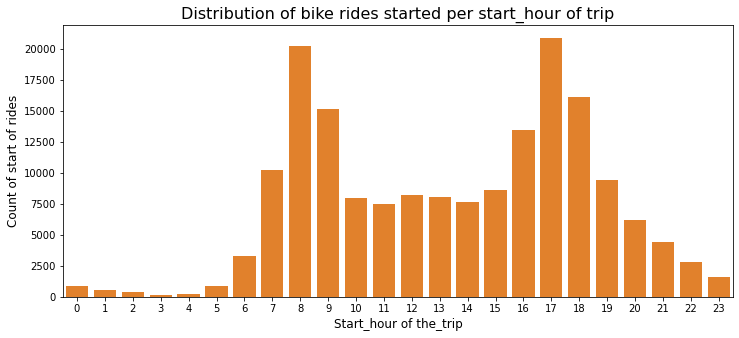

In [31]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=data_clean, x='start_hour', color=base_color)
plt.xlabel('Start_hour of the_trip', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Distribution of bike rides started per start_hour of trip', fontsize=16);

- The most busy hour is 5 PM, second busy hour is 8 AM. The busy hours are 7-9 AM in morning and 4-6PM in the evening. This time is common commuting time.
- There is clearly a high number of bike trips during the peak hours when people go to school or work or they commute from it to home. This makes sense since during the weekends less people have to go to work or study as they do during the week days.
- It will be interesting to find out how this distribution is different between weekdays and the weekend.

##### what is the distribution of bike rides relative to start hour of the day?

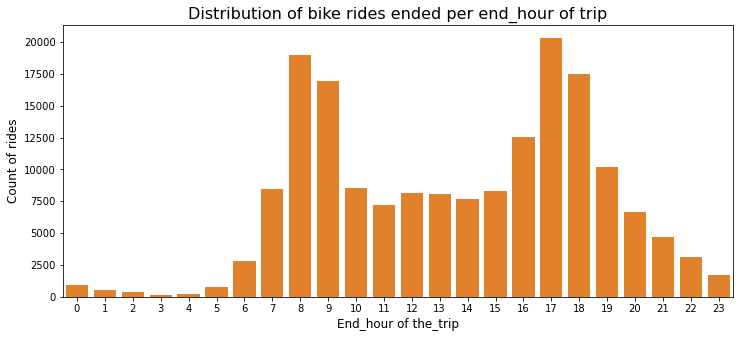

In [32]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=data_clean, x='end_hour', color=base_color)
plt.xlabel('End_hour of the_trip', fontsize=12)
plt.ylabel('Count of rides', fontsize=12)
plt.title('Distribution of bike rides ended per end_hour of trip', fontsize=16);

- The most busy hour is 5 PM, second busy hour is 8 AM. The busy hours are 8-9 AM in morning and 4-7PM in the evening. This time is common commuting time.
- There is clearly a high number of bike trips during the peak hours when people go to school or work or they commute from it to home. This makes sense since during the weekends less people have to go to work or study as they do during the week days.
- It will be interesting to find out how this distribution is different between weekdays and the weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I saw that during weekdays the number of trips is somewhat the double during the weekend.
- Further I learned that that the distribution of starting a bike trip is bimodal: most trips start between 8-9 or between 17-18 o'clock.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I converted several variables to a correct datatype (start_time, end_time, start_station_id,bike_id, user_type). And created several additional variables (start_day, end_day, start_day_of_week, end_day_of_week, start_hour, end_hour) to be able to create plots with different time resolutions.

It will be interesting to find out how the distribution is different between weekdays and the weekend between Customers and Subscribers. Plus to find out how the distribution of bike rides over the day is different between Customers and Subscribers; it might well be that Customers have another distribution than the above mentioned bimodal distribution since they are not bound to office hours..

<a id='bi'></a>

## Bivariate Exploration

##### what is the relationship between duration_min OF BIKE TRIPS AND user_type?

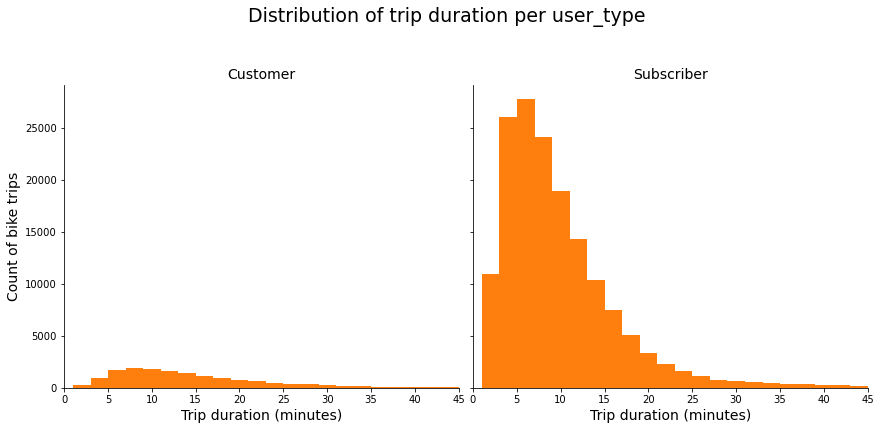

In [33]:
g = sns.FacetGrid(data = data_clean, col = 'user_type', col_wrap = 2, height = 6)
base_color = sns.color_palette()[1]

g.map(plt.hist, 'duration_min', bins = np.arange(data_clean['duration_min'].min(), data_clean['duration_min'].max()+1, 2), color = base_color)
g.set_ylabels('Count of bike trips', size=14)
g.set_xlabels('Trip duration (minutes)', size=14)
g.set_titles('{col_name}', size=14);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of trip duration per user_type', fontsize=19);
plt.xlim(0,45);

- The 2 distributions above tell that Subscribers typically have shorter bike trips (with quite high mode in the bin 6-8 minutes)

##### what can be said in comparing usage profile of user_types and day_of_week?

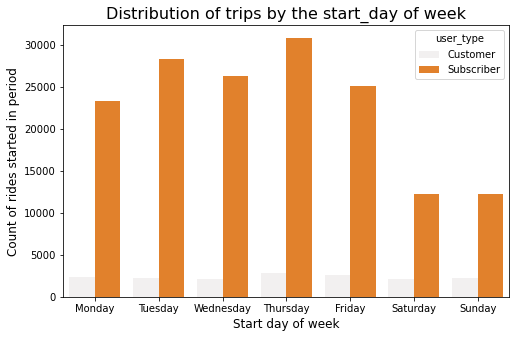

In [34]:
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data_clean['start_day_of_week'] = data_clean['start_day_of_week'].astype(weekdaycat)

sns.countplot(data=data_clean, x='start_day_of_week', hue='user_type', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

- Subscribers mainly hire a bike during weekdays (more than double), and Customers hire especially in the mid-week(thursday)

##### what can be said in comparing usage profile of user_types and hour_of_day?

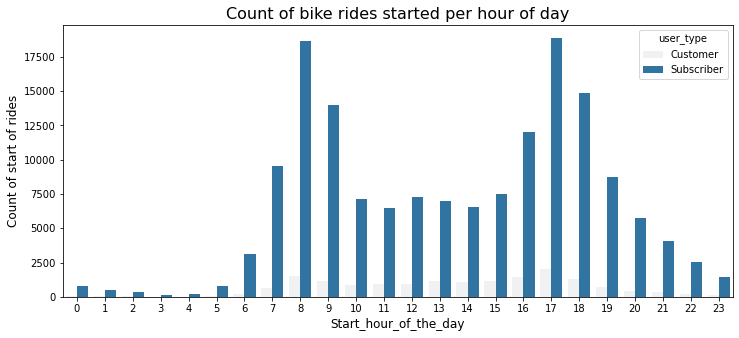

In [35]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[0]
sns.countplot(data=data_clean, x='start_hour', hue='user_type', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Count of bike rides started per hour of day', fontsize=16);

- Here we see that Customers have as busy hours for starting their bike trip after 7am and also after 3pm and before 6 o'clock. 8am and 5pm is a busy hour of the Subscribers.

##### using a barplot, a violinplot and a boxplot to analyse the relationship between 'duration_min' of trip and 'user_type', is there any observation?

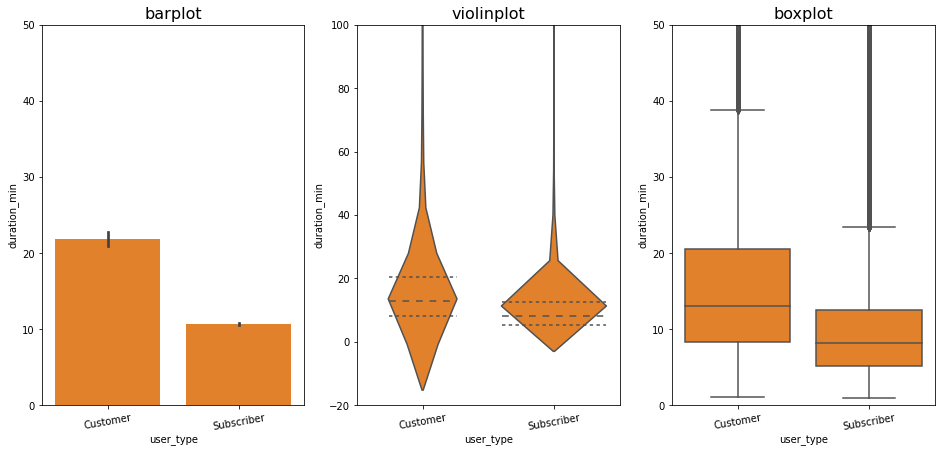

In [36]:
plt.figure(figsize = [16, 7])
base_color = sns.color_palette()[1]

# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sns.violinplot(data = data_clean, x = 'user_type', y = 'duration_min', inner='quartile', color = base_color)       
            # by setting inner = 'quartile' in violin plot, three lines will be plotted within each violin area for the three middle quartiles. 
            # The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.
plt.xticks(rotation = 10)             # include label rotation due to small subplot size
plt.ylim(-20,100)
plt.title('violinplot', fontsize=16)

# left plot: barplot
plt.subplot(1, 3, 1)
sns.barplot(data = data_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(0,50)              # set y-axis limits to be same as left plot
plt.title('barplot', fontsize=16);

# right plot: boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data = data_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(0,50)              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);

- The barplot on the left shows that the average bike trip duration of Customers is almost the double of Subscribers (22 vs 10 minutes).

- The violinplot in the middle shows that the that third quartile of Subscribers (13 min) is even below the median of the Customers distribution (15 min).

- The boxplot on the right tells that for both user_types there are points above the higher whisker that indicate individual outlier points that are more than 1.5 times the IQR above the third quartile. 

##### what can we say concerning hours of ride with respect to gender?

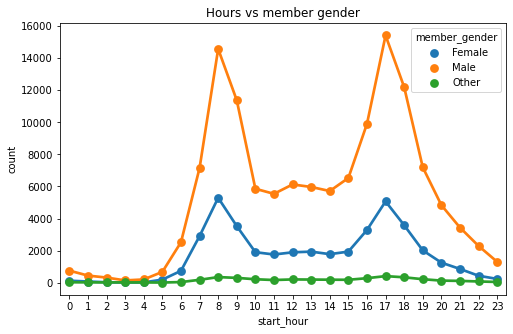

In [37]:
data=data_clean.groupby(["start_hour","member_gender"]).size().reset_index()
plt.figure(figsize=(8, 5))
sns.pointplot(data=data,x="start_hour",hue="member_gender",y=0)
plt.title("Hours vs member gender");
plt.ylabel("count");

- In the first hours of the day there is no a big diffrence but after it become very obvious that the males is the most users

##### what can we say concerning hours of ride with respect to user type?

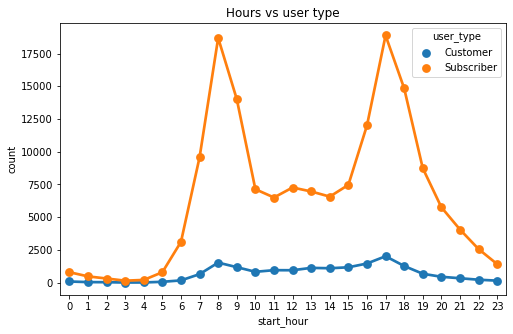

In [38]:
data=data_clean.groupby(["start_hour","user_type"]).size().reset_index()
plt.figure(figsize=(8, 5))
sns.pointplot(data=data,x="start_hour",hue="user_type",y=0)
plt.title("Hours vs user type");
plt.ylabel("count");

- In the first hours of the day there is no a big diffrence but after that specially in the rush hours the diffrence become very big

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The barplot and violinplot show that the bike trip duration of Customers is about the double of Subscribers (22 vs 10 minutes).
- Subscribers mainly hire a bike during weekdays (more than double the level of weekends), and Customers hire especially in the weekend.
- We found that Customers have as busy hours for starting their bike trip after 7am and also after 3pm and before 6 o'clock. 8am and 5pm is a busy hour of the Subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- the hours which trips are at its peak

<a id='multi'></a>

## Multivariate Exploration

##### what is the distribution of  trip by start_day_of_week?

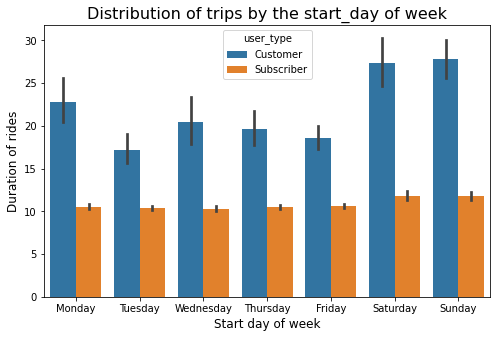

In [39]:
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data_clean['start_day_of_week'] = data_clean['start_day_of_week'].astype(weekdaycat)

sns.barplot(data=data_clean, x='start_day_of_week', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

- The clustered barchart above shows a significant higher trip duration during weekend days by Customers.
- The duration is about 27.5 minutes during weekend days, which is about 10% higher than the highest score during a weekday:

##### Any observation concerning trip duration in seconds during the week by user types?

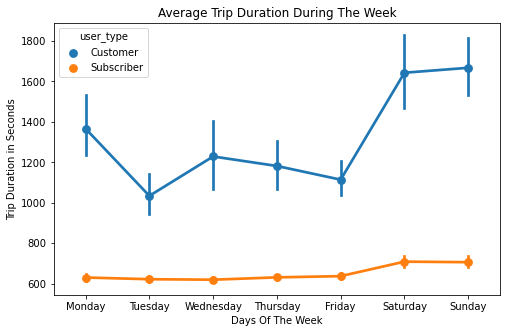

In [40]:
plt.figure(figsize=(8, 5))
ax = sns.pointplot(data=data_clean, x='start_day_of_week' , y='duration_sec', hue='user_type')
plt.xlabel('Days Of The Week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During The Week');

- This graph is as expected where the duration for a trip is longer during the weekends than weekdays irrespective of the user types.

##### what is the trip duration profile over the days-of-the-week?

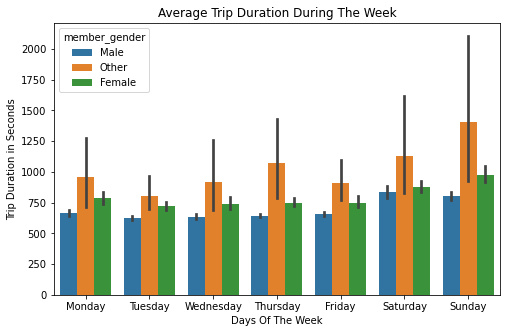

In [41]:
plt.figure(figsize=(8, 5))
axes = sns.barplot(data=data_clean, x='start_day_of_week' , y='duration_sec', hue='member_gender')
plt.xlabel('Days Of The Week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During The Week');

##### what is the trip duration profile over the hours-of-the-day?

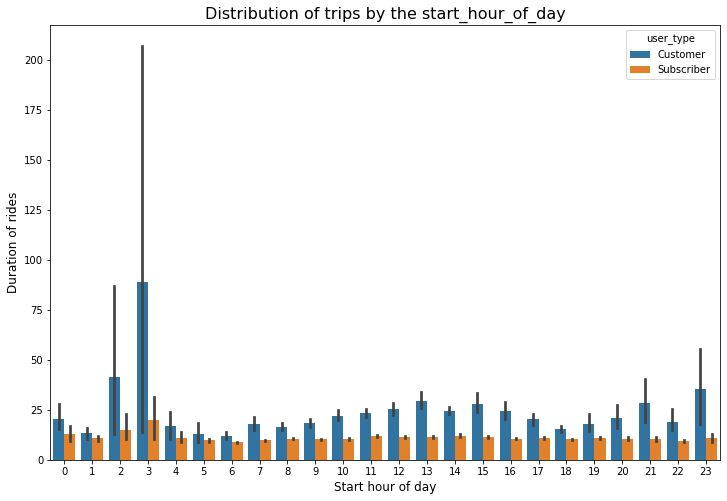

In [42]:
plt.figure(figsize=(12, 8))
base_color = sns.color_palette()[1]


sns.barplot(data=data_clean, x='start_hour', y='duration_min', hue='user_type')
plt.xlabel('Start hour of day', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_hour_of_day", fontsize=16);

#####  how did the hourly usage varies during a week for Customers and Subscribers?

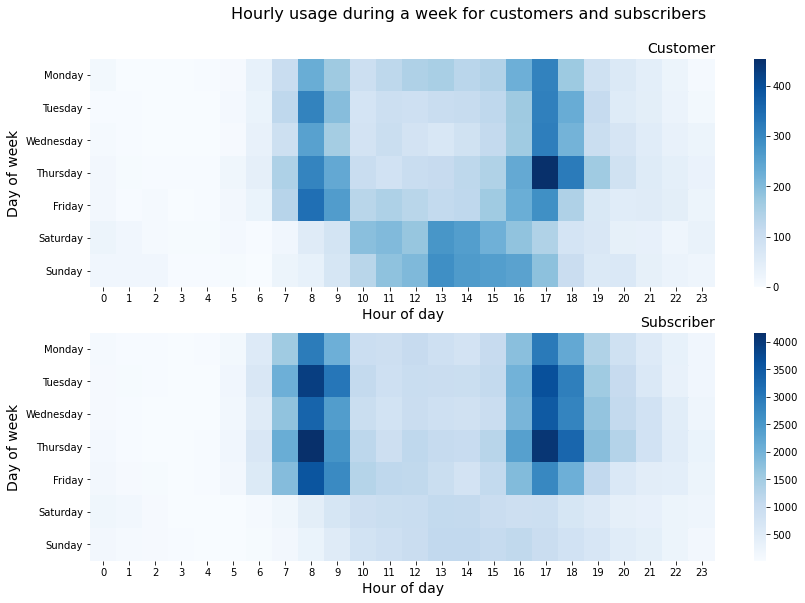

In [43]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = data_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
sns.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = data_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
sns.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

- It is interesting, that Customers tend to use the bike service mostly on Thursday and friday (8am and 5pm), while Subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 16-18 PM)

<a id='conclusions'></a>

## Conclusion

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

-  Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and subcribers tend to be people that use them to go to work or school:
- Subscribers mainly hire a bike during weekdays (more than double the level of weekends), and Customers hire especially in the weekend.
- The bike trip duration of Customers is about the double of Subscribers (22 vs 10 minutes).
- A significant higher trip duration during weekend days by Customers. The duration is about 27.5 minutes during weekend days, which is about 10% higher than the highest score during a weekday.
- For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week.
- It is interesting, that Customers tend to use the bike service mostly on Thursday/Friday from 8AM to 5 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 16-18 PM).

### Were there any interesting or surprising interactions between features?

- The trip duration has a dip between 4 and 6 o'clock, for both user_types.